In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import torch

In [2]:
url='https://drive.google.com/file/d/1621A5bgVi7Nm11gzDQiATWmZqSS0sqGe/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,Year,Month,Time format,No. of flights,No. of hotels booked,Tourism_in_Kerala,kerala_tourism_package,Tourist_places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min,Tourists
0,2010,Jan,01-2010,2990.0,514000.0,87,67,10,51,78,0,35,6.8313,29.3500,15.4200,8.183560e+05
1,2010,Feb,02-2010,2810.0,457000.0,83,78,18,44,72,0,35,20.1979,31.7900,16.1100,7.212010e+05
2,2010,Mar,03-2010,3140.0,417000.0,93,50,9,47,66,0,90,66.8573,33.3100,18.4200,7.199440e+05
3,2010,Apr,04-2010,2670.0,434000.0,95,97,9,49,65,0,100,94.4786,33.7100,20.6200,7.354320e+05
4,2010,May,05-2010,2520.0,488000.0,90,69,0,54,64,0,56,112.6957,33.0600,19.1500,8.034310e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022,Aug,08-2022,4860.0,914000.0,19,39,69,81,61,7,12,969.5651,29.9072,18.8279,1.518583e+06
152,2022,Sep,09-2022,6160.0,846000.0,23,52,83,86,65,4,12,405.0702,30.1213,19.3321,1.602462e+06
153,2022,Oct,10-2022,6410.0,1140000.0,21,60,79,83,58,9,13,332.0119,29.6674,18.3958,1.775547e+06
154,2022,Nov,11-2022,6650.0,1260000.0,22,32,75,84,58,4,13,190.9530,28.8275,16.7351,1.724940e+06


In [ ]:
# removing the outliers
for i in range(120,144):
    df=df.drop(index=i, axis=0)

In [167]:
df

,Year,Month,Time format,No. of flights,No. of hotels booked,Tourism_in_Kerala,kerala_tourism_package,Tourist_places,Travel,Food_Drink,Flights_Kerala,Trains_Kerala,Rain,T_Max,T_Min,Tourists
0,2010,Jan,01-2010,-1.495712,-0.884701,2.026080,0.991795,-1.045371,-0.878318,1.123106,-0.698796,0.053987,-0.824289,-0.397869,-0.357263,-0.974717
1,2010,Feb,02-2010,-1.664812,-1.162402,1.819401,1.717645,-0.702008,-1.414005,0.546258,-0.698796,0.053987,-0.771816,0.440633,-0.292316,-1.263187
2,2010,Mar,03-2010,-1.354795,-1.357280,2.336098,-0.129973,-1.088291,-1.184425,-0.030590,-0.698796,3.522537,-0.588648,0.962980,-0.074887,-1.266919
3,2010,Apr,04-2010,-1.796335,-1.274457,2.439438,2.971387,-1.088291,-1.031371,-0.126732,-0.698796,4.153183,-0.480216,1.100439,0.132189,-1.220933
4,2010,May,05-2010,-1.937252,-1.011372,2.181089,1.123768,-1.474575,-0.648738,-0.222873,-0.698796,1.378343,-0.408702,0.877067,-0.006175,-1.019032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2022,Aug,08-2022,0.261052,1.064077,-1.487462,-0.855823,1.486930,1.417483,-0.511297,-0.278700,-1.396498,2.955068,-0.206388,-0.036493,1.104382
152,2022,Sep,09-2022,1.482332,0.732785,-1.280783,0.002000,2.087816,1.800117,-0.126732,-0.458741,-1.396498,0.739058,-0.132813,0.010965,1.353433
153,2022,Oct,10-2022,1.717194,2.165137,-1.384122,0.529891,1.916134,1.570537,-0.799721,-0.158673,-1.333433,0.452257,-0.288795,-0.077165,1.867353
154,2022,Nov,11-2022,1.942661,2.749771,-1.332453,-1.317728,1.744453,1.647063,-0.799721,-0.458741,-1.333433,-0.101491,-0.577426,-0.233478,1.717092


# normalising

In [14]:
for i in df.columns[3:]:
    df[i] = (df[i]-df[i].mean() )/df[i].std()

<ipython-input-168-b4b1b00bc1f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr())


<Axes: >

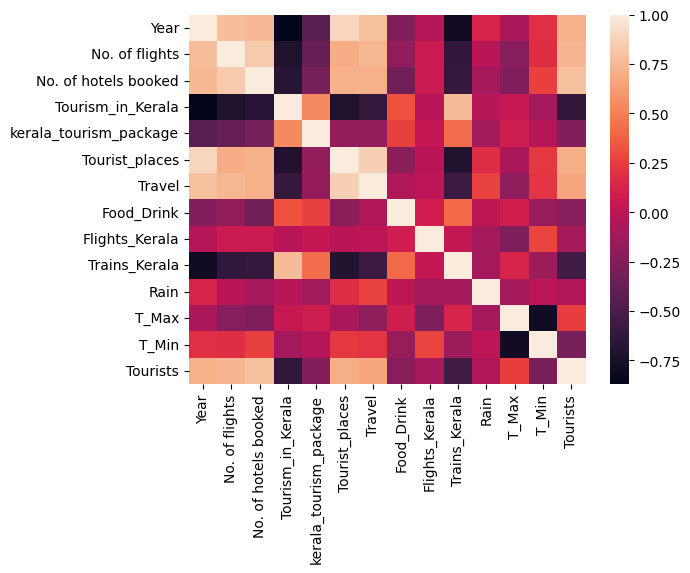

In [168]:
sn.heatmap(df.corr())

## Temporal Fusion Transformer

In [ ]:
# preparing dataset to feed into the model :
data = df.copy()
k=1
for i in range(0,156):
    data['Time format '][i] = int(k)
    if(i<=119 or i>=144):
        k=k+1

In [87]:
data.columns = ['Year', 'Month', 'time_idx', 'No of flights',
       'No of hotels booked', 'Tourism_in_Kerala', 'kerala_tourism_package',
       'Tourist_places', 'Travel', 'Food_Drink', 'Flights_Kerala',
       'Trains_Kerala', 'Rain', 'T_Max', 'T_Min', 'Tourists']

data['time_idx'] = data['time_idx'].astype(int)

In [88]:
train = data.iloc[:120]
test = data.iloc[144:]   ## we will predict the values for the year 2021

In [142]:
max_prediction_length = 6  ## We will predict the entire 2021 year
max_encoder_length = 120
training_cutoff = train['time_idx'].max() - max_prediction_length

In [119]:
import copy
from pathlib import Path
import warnings

import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, MAPE, RMSE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

In [143]:
training = TimeSeriesDataSet(train[lambda x: x.time_idx <= training_cutoff],
                             time_idx = 'time_idx',
                             target='Tourists',
                             group_ids=['Year'],
                             min_encoder_length=max_prediction_length,  # keep encoder length long (as it is in the validation set)
                             max_encoder_length=max_encoder_length,
                             max_prediction_length=max_prediction_length,
                             static_categoricals=[],
                             time_varying_known_categoricals=['Month'],
                             time_varying_known_reals=['No of hotels booked','No of flights'],
                             time_varying_unknown_categoricals=[],
                             time_varying_unknown_reals=['Tourism_in_Kerala', 'kerala_tourism_package','Tourist_places', 'Travel', 'Food_Drink',
                                                         'Flights_Kerala','Trains_Kerala', 'Rain', 'T_Max', 'T_Min'],
                             add_relative_time_idx=True,
                             add_target_scales=True,
                             add_encoder_length=True)

/usr/local/lib/python3.10/dist-packages/pytorch_forecasting/data/timeseries.py:1281: UserWarning: Min encoder length and/or min_prediction_idx and/or min prediction length and/or lags are too large for 1 series/groups which therefore are not present in the dataset index. This means no predictions can be made for those series. First 10 removed groups: [{'__group_id__Year': 2019}]
  warnings.warn(


In [144]:
# for each series
validation = TimeSeriesDataSet.from_dataset(training, train, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 12  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

In [169]:
PATIENCE = 30
MAX_EPOCHS = 120
LEARNING_RATE = 0.03
OPTUNA = False

In [146]:
early_stop_callback = EarlyStopping(monitor="train_loss", min_delta=1e-2, patience=PATIENCE, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=MAX_EPOCHS,
    devices=1, accelerator="cpu",
    enable_model_summary=True,
    gradient_clip_val=0.25,
    limit_train_batches=12,  # coment in for training, running valiation every 30 batches
    #fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=LEARNING_RATE,
    lstm_layers=2,
    hidden_size=16,
    attention_head_size=2,
    dropout=0.2,
    hidden_continuous_size=8,
    output_size=1,  # 7 quantiles by default
    loss=SMAPE(),
    log_interval=10,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    reduce_on_plateau_patience=4
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [152]:
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/callbacks/model_checkpoint.py:630: Checkpoint directory lightning_logs/lightning_logs/version_1/checkpoints exists and is not empty.
INFO: 
   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | SMAPE                           | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 72    
3  | prescalers                         | ModuleDict                      | 256   
4  | static_variable_selection          | VariableSelectionNetwork        | 1.7 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 9.4 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.9 K 
7  | static_context_variable_selection  | GatedRe

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings

In [160]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader, mode="prediction")
#raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)

sm = SMAPE()
print(f"Validation median SMAPE loss: {sm.loss(actuals, predictions).mean(axis = 1).median().item()}")

sm = MAPE()
print(f"Validation median MAPE loss: {sm.loss(actuals, predictions).mean(axis = 1).median().item()}")

sm = MAE()
print(f"Validation median MAE loss: {sm.loss(actuals, predictions).mean(axis = 1).median().item()}")

sm = RMSE()
print(f"Validation median RMSE loss: {sm.loss(actuals, predictions).mean(axis = 1).median().item()}")

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:198: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature na

Validation median SMAPE loss: 0.4555802643299103
Validation median MAPE loss: 0.3442588746547699
Validation median MAE loss: 0.15324510633945465
Validation median RMSE loss: 0.04431244730949402


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warn